# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [6]:
data.isna().values.any()

False

In [29]:
data.duplicated().values.any()

False

In [18]:
for column in data.columns:
    print(type(data[column]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [19]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [39]:
change_char = [",", "$"]
columns_to_clean = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross']

for col in columns_to_clean:
    for char in change_char:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])

/var/folders/pq/z_1hqkxd1kz4112pskn2h0tw0000gn/T/ipykernel_87714/3866774597.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [27]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [28]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,1916-05-09,Intolerance,"$385,907",$0,$0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [53]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
count,"5,391.00","5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"
min,1.00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"


In [41]:
data['USD_Production_Budget'].mean()

31113737.57837136

In [42]:
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [44]:
data.loc[data['USD_Domestic_Gross'].idxmin()]

Rank                                    5140
Release_Date             1916-05-09 00:00:00
Movie_Title                      Intolerance
USD_Production_Budget                 385907
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 1, dtype: object

In [45]:
data['profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
data_profit = data.sort_values("profit", ascending=True)
data.profit.quantile(.25)

-2244775.0

In [46]:
data.loc[data['USD_Production_Budget'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
profit                            2358918982
Name: 3529, dtype: object

In [47]:
data.loc[data['USD_Worldwide_Gross'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
profit                            2358918982
Name: 3529, dtype: object

In [48]:
data.loc[data['profit'].idxmin()]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
profit                            -175000000
Name: 5388, dtype: object

In [54]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [58]:
zero_domestic = data.loc[data['USD_Domestic_Gross'] == 0]
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [52]:
data.loc[data['USD_Domestic_Gross'] == 0].USD_Production_Budget.idxmax()
data.loc[5388]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
profit                            -175000000
Name: 5388, dtype: object

In [57]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [59]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]

In [62]:
international_releases.sort_values('USD_Production_Budget', ascending=True)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
4796,5359,2015-01-09,Backmask,25000,428923,0,403923
4072,5319,2011-12-31,Absentia,70000,8555,0,-61445
4535,5276,2013-12-31,Speak No Evil,150000,32927,0,-117073
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0,-138173
4862,5206,2015-03-24,Along the Roadside,250000,3234,0,-246766
...,...,...,...,...,...,...,...
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0,41833602
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0,-41817844
4295,1230,2012-12-31,Foodfight!,45000000,73706,0,-44926294
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0,-16919875


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [65]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [66]:
future_release = data[data.Release_Date >= scrape_date]
future_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [72]:
data_clean = data.drop(future_release.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [69]:
data_minus = data[data.profit < 0]
loss_percentage = len(data_minus)/len(data) * 100
loss_percentage

37.3585605639028

# Seaborn for Data Viz: Bubble Charts

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

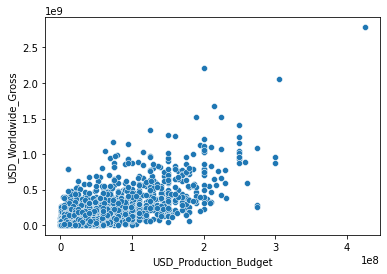

In [73]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

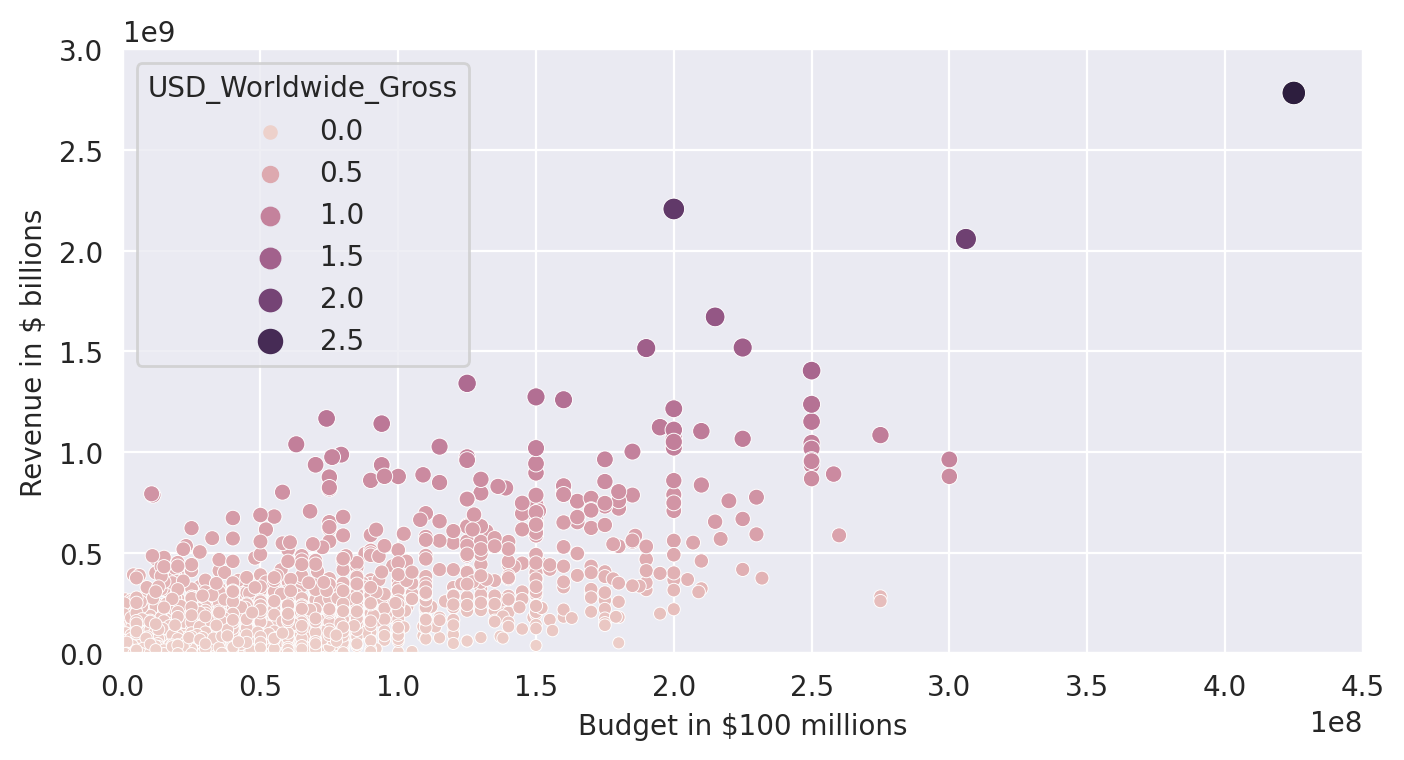

In [76]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



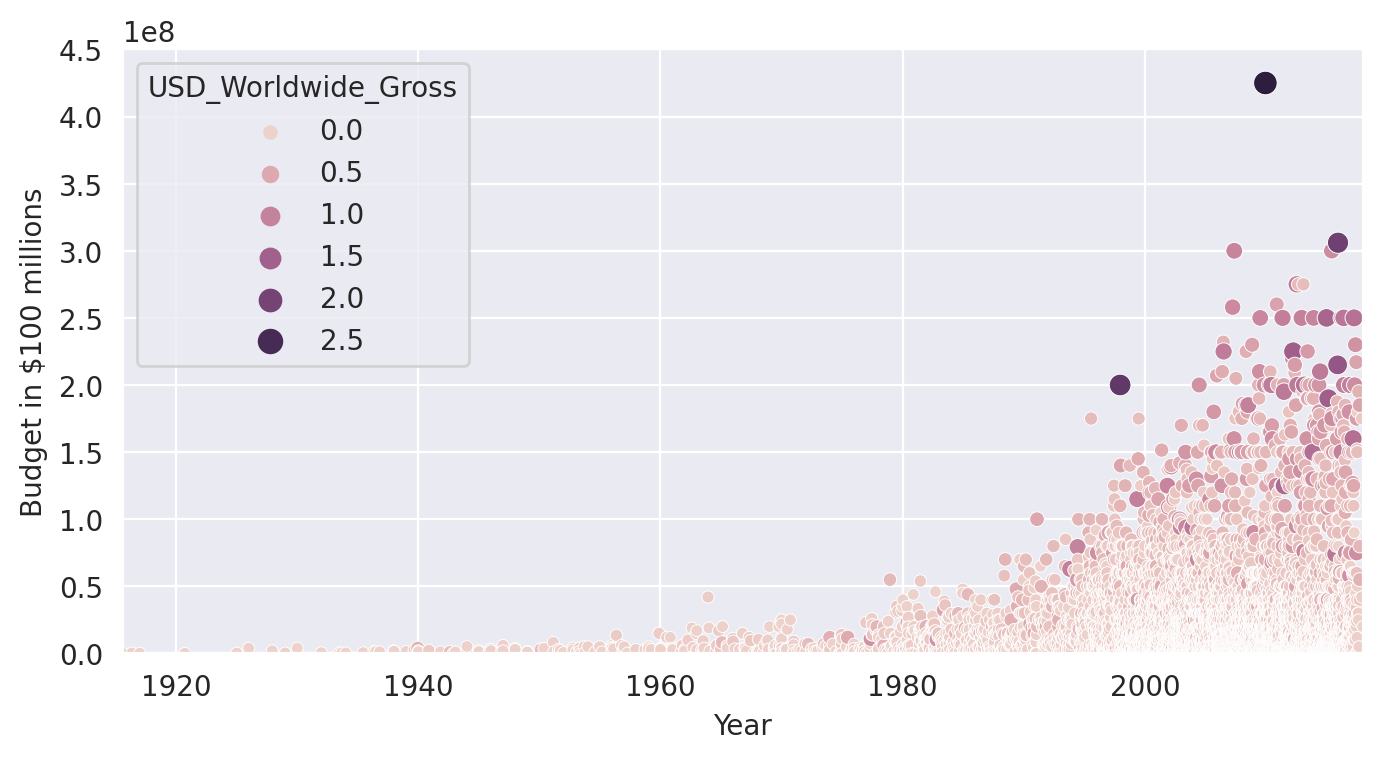

In [81]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date', 
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           ylabel='Budget in $100 millions',
           xlabel='Year')

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [84]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
dt_index.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [88]:
decade = dt_index.year//10*10
data_clean['Decade'] = decade
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,profit,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,2010


In [89]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 0 to 5383
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
 6   profit                 5384 non-null   int64         
 7   Decade                 5384 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 378.6+ KB


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [90]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]

In [91]:
old_films.loc[old_films['USD_Production_Budget'].idxmax()]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
profit                              29000000
Decade                                  1960
Name: 109, dtype: object

In [94]:
old_films.shape

(153, 8)

# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

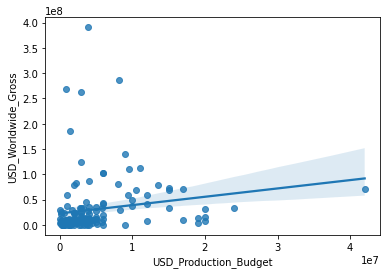

In [95]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

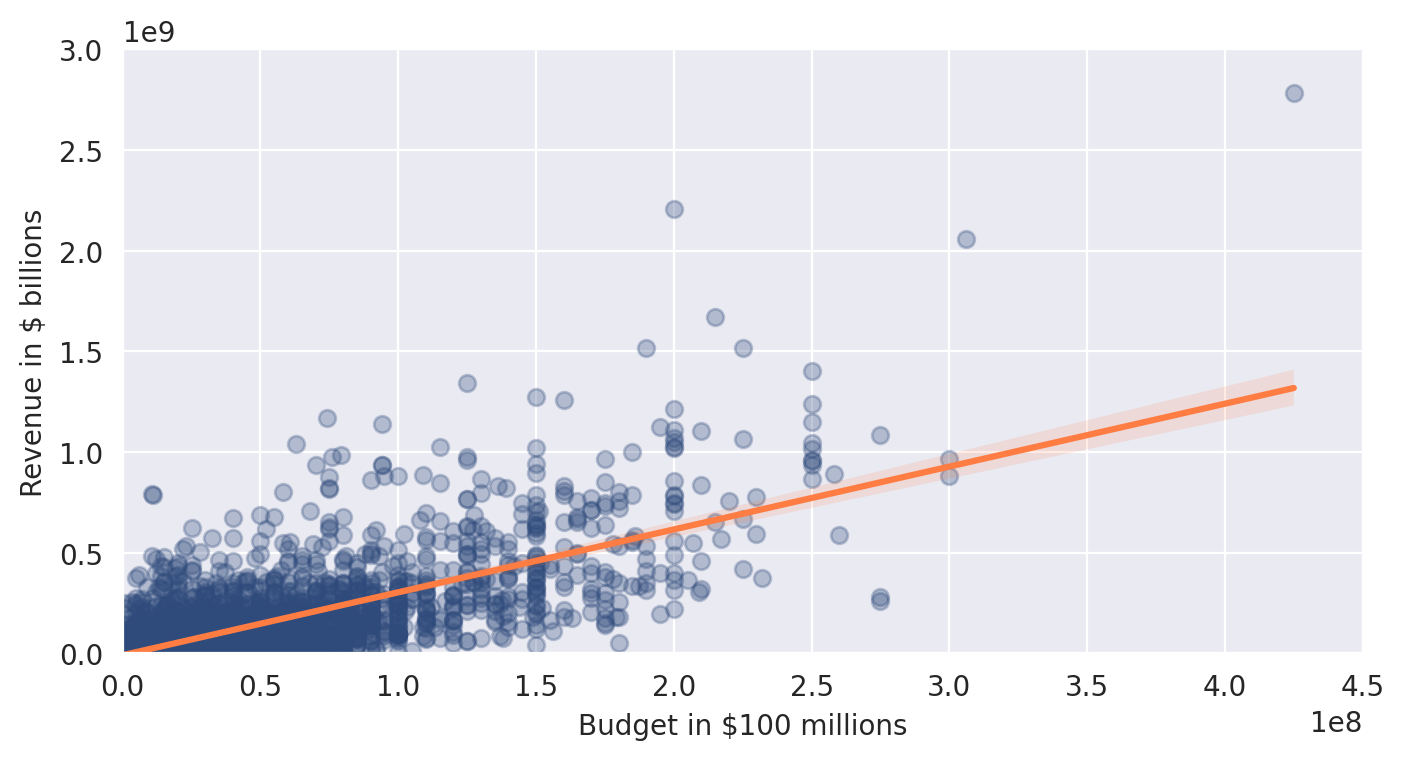

In [98]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws={'color':'#ff7c43'})
    
    ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')
    
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

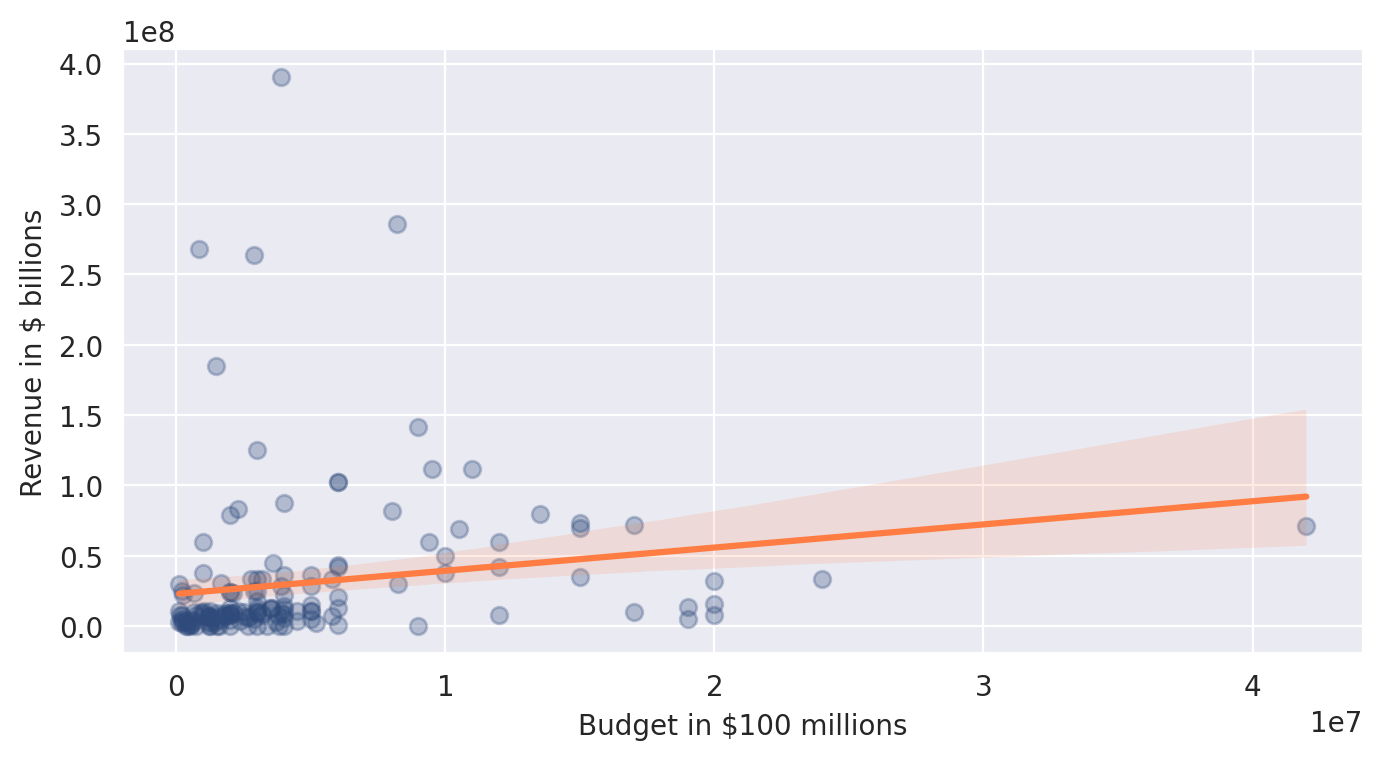

In [102]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws={'color':'#ff7c43'})
    
    ax.set(
#           ylim=(old_films.USD_Worldwide_Gross.min(), old_films.USD_Worldwide_Gross.max()),
#           xlim=(old_films.USD_Production_Budget.min(), old_films.USD_Production_Budget.max()),
            ylabel='Revenue in $ billions',
            xlabel='Budget in $100 millions'
    )
    
plt.show()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [105]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [114]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
regression.intercept_

array([-8650768.00661021])

In [111]:
regression.coef_

array([[3.12259592]])

In [112]:
regression.score(X, y)

0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [117]:
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * 350000000

In [118]:
revenue_estimate = round(revenue_estimate, -6)

In [119]:
revenue_estimate

1084000000.0